In [24]:
!pip install opencv-python

In [25]:
import cv2

In [26]:
from IPython.display import Image

In [27]:
net=cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

In [28]:
net

<dnn_Net 000001D712C3EB90>

In [29]:
with open('coco.names') as f:
    classes=f.read().split('\n')
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '']


In [69]:
img=cv2.imread('photo2.jpg')
h,w,d=img.shape
print(h,w,d)

5472 3648 3


In [70]:
blob=cv2.dnn.blobFromImage(img, 1/255, (608,608), (0,0,0), swapRB=True, crop=False)

In [71]:
net.setInput(blob)

In [72]:
layer_names=net.getLayerNames()
out_layers_index=net.getUnconnectedOutLayers()
out_layers=[layer_names[index[0]-1] for index in out_layers_index]

In [73]:
out_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [74]:
outs=net.forward(out_layers)

In [82]:
#for out in outs:
#    for obj in out:
#        print(obj)

In [83]:
def draw_obj(img,index,score,box):
    x,y,w,h=box
    start=(x,y)
    end=(x+w,y+h)
    color=(0,255,0)
    width=2
    img=cv2.rectangle(img,start,end,color,width)
    
    start=(x-10,y-10)
    font_size=1
    font = cv2.FONT_HERSHEY_SIMPLEX 
    color = (0, 255, 0) 
    width=2  
    text=classes[index]
    img = cv2.putText(img, text, start, font, font_size, color, width, cv2.LINE_AA) 
    return img

In [77]:
class_indexes=[]
class_scores=[]
boxes=[]

import numpy as np
for out in outs:
    for obj in out:
        scores=obj[5:]
        class_index=np.argmax(scores)
        class_score=scores[class_index]
        if class_score >0:
            centr_x=int(obj[0]*w)
            centr_y=int(obj[1]*h) #получаем координаты начала объекта 
            obj_w=int(obj[2]*w)#ширина объекта
            obj_h=int(obj[3]*h)#высота объекта
            x=centr_x-obj_w//2
            y=centr_y-obj_h//2
            box=[x,y,obj_w,obj_h]
            boxes.append(box)
            class_indexes.append(class_index)
            class_scores.append(float(class_score))

In [78]:
chosen_boxes=cv2.dnn.NMSBoxes(boxes,class_scores, 0,0.4)

In [79]:
for box_index in chosen_boxes:
    box_index=box_index[0]
    img=draw_obj(img,class_indexes[box_index],class_scores[box_index],boxes[box_index])

In [80]:
cv2.imwrite('Photo_2.jpg',img)

True

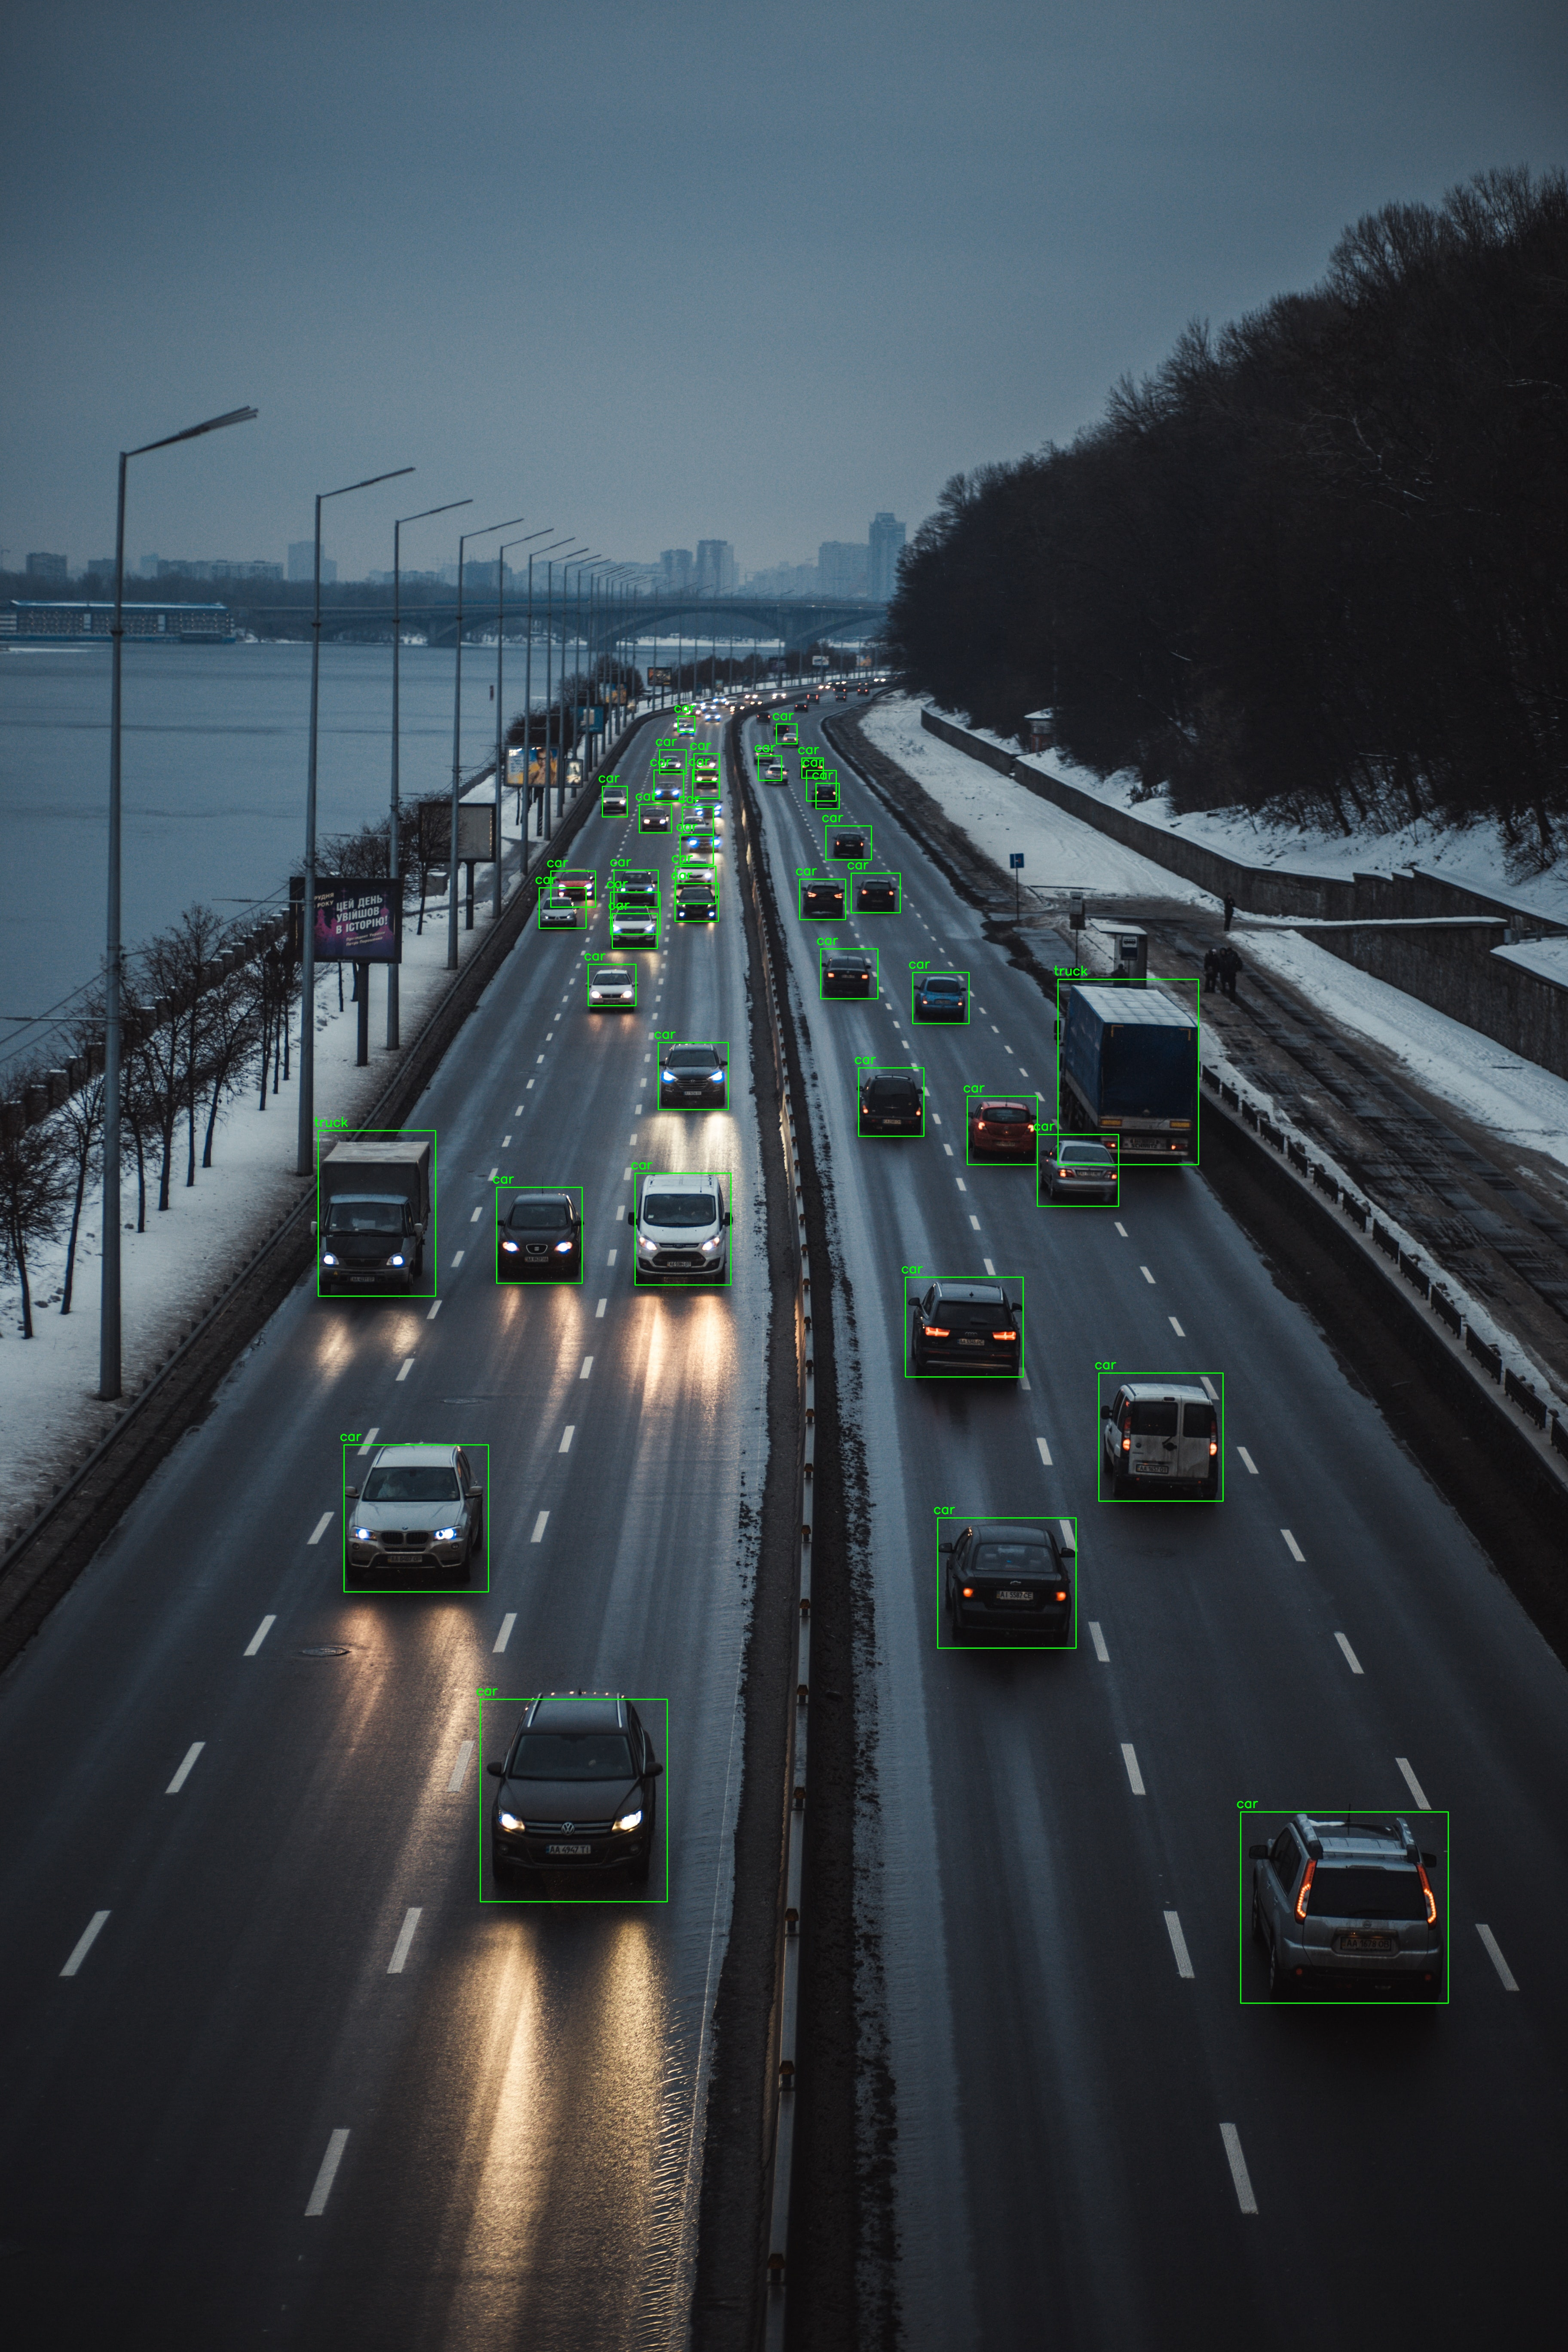

In [81]:
Image('Photo_2.jpg')